# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl07_rnn_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [15]:
import tensorflow as tf
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [16]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
n_steps = 50
s = 10000
t = 7000
v = 9000
series = generate_time_series(s, n_steps + 1)
X_train, y_train = series[:t, :n_steps], series[:t, -1]
X_valid, y_valid = series[t:v, :n_steps], series[t:v, -1]
X_test, y_test = series[v:, :n_steps], series[v:, -1]


In [17]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

def plot_set(data_x, data_y, data_y_pred):
    l = min(len(data_x),6)
    r = l//3
    c = 3
    fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, figsize=(12, 8), squeeze=False)
    for row in range(r):
        for col in range(c):
            i = row * c + col
            plt.sca(axes[row][col])
            if i < l:
                plot_series(data_x[i, :, 0], data_y[i, 0],data_y_pred[i, 0],
                        y_label=("$x(t)$" if col==0 else None),
                        legend=(col == 0))
    plt.show()
    
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

# plot_set(X_valid, y_valid, y_pred)

# last

mse:  0.020211367


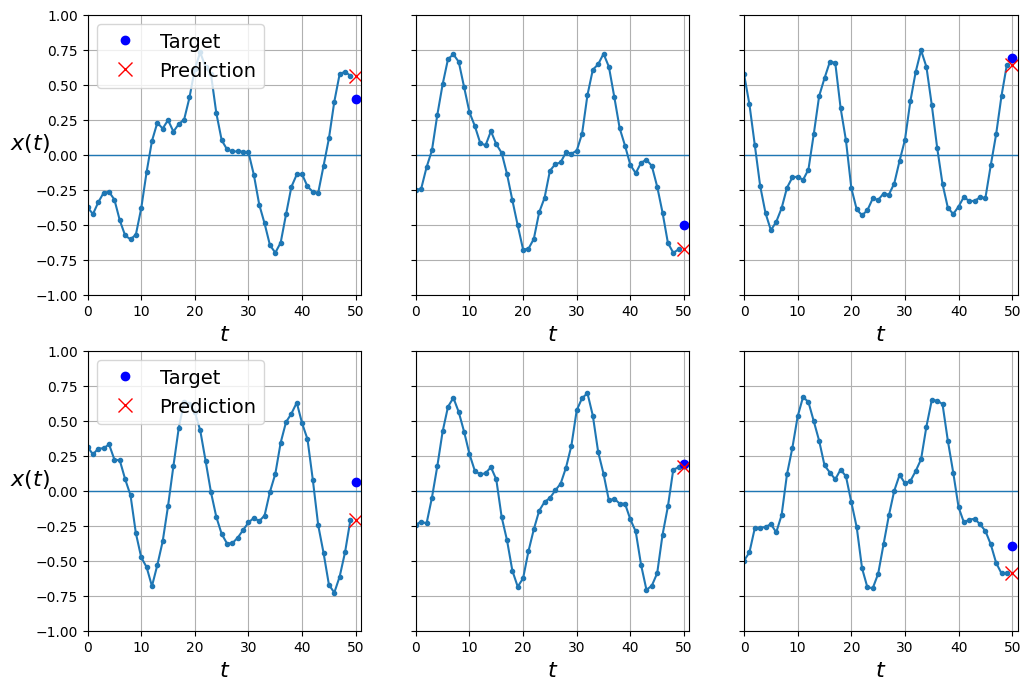

In [18]:
y_pred_last = X_valid[:, -1]
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_last)))
# plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plot_set(X_valid, y_valid, y_pred_last)

# linear

In [19]:
model_l = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])
model_l.compile(loss="mse", optimizer="adam")
history = model_l.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 0s 1ms/step - loss: 0.2793 - val_loss: 0.1243
Epoch 2/20
219/219 [==============================] - 0s 834us/step - loss: 0.0829 - val_loss: 0.0464
Epoch 3/20
219/219 [==============================] - 0s 597us/step - loss: 0.0351 - val_loss: 0.0239
Epoch 4/20
219/219 [==============================] - 0s 584us/step - loss: 0.0207 - val_loss: 0.0169
Epoch 5/20
219/219 [==============================] - 0s 648us/step - loss: 0.0154 - val_loss: 0.0137
Epoch 6/20
219/219 [==============================] - 0s 642us/step - loss: 0.0127 - val_loss: 0.0120
Epoch 7/20
219/219 [==============================] - 0s 908us/step - loss: 0.0113 - val_loss: 0.0108
Epoch 8/20
219/219 [==============================] - 0s 674us/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/20
219/219 [==============================] - 0s 533us/step - loss: 0.0095 - val_loss: 0.0092
Epoch 10/20
219/219 [==============================] - 0s 572us/step - loss: 0.0088 

63/63 [==============================] - 0s 341us/step
mse:  0.0050523984


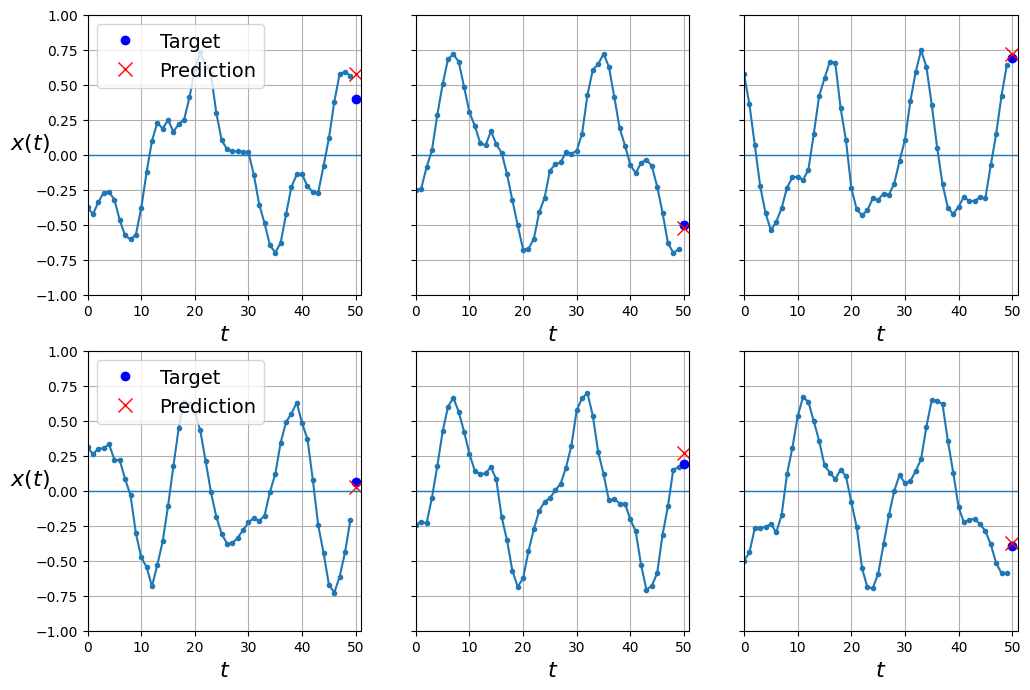

In [20]:
y_pred_lin = model_l.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_lin)))
plot_set(X_valid, y_valid, y_pred_lin)

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0156 - val_loss: 0.0109
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.0114 - val_loss: 0.0110

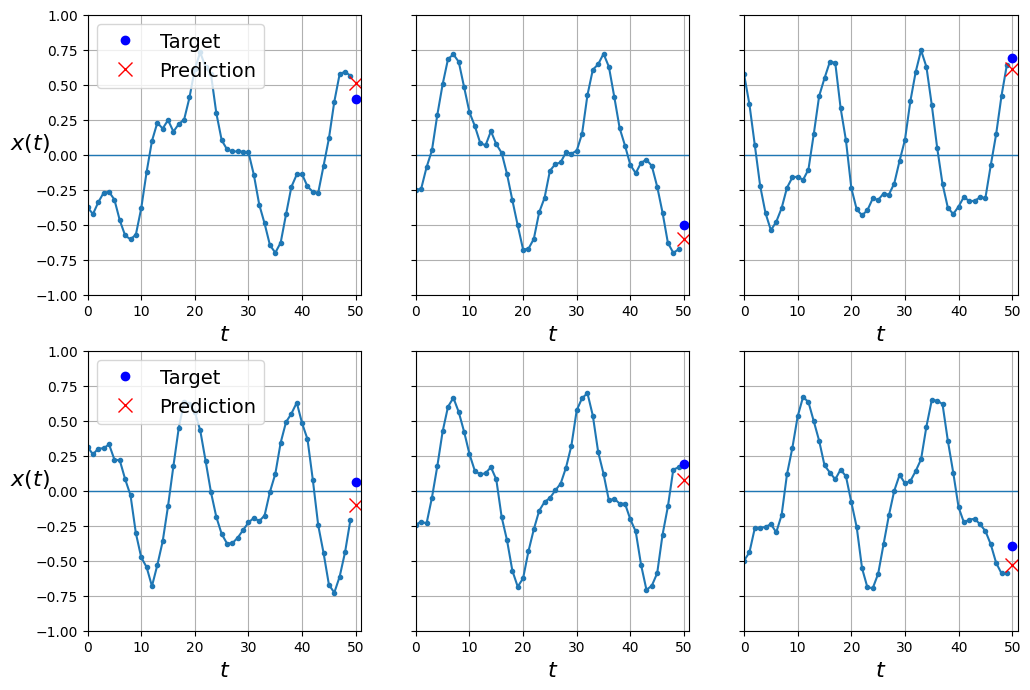

In [21]:
model_rnn1 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model_rnn1.compile(loss="mse", optimizer=optimizer)
model_rnn1.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

y_pred_rnn1 = model_rnn1.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_rnn1)))
plot_set(X_valid, y_valid, y_pred_rnn1)

Epoch 1/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0091 - val_loss: 0.0043
Epoch 2/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0034 - val_loss: 0.0041
Epoch 3/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 9/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 10/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0032 - val_loss: 0.0032

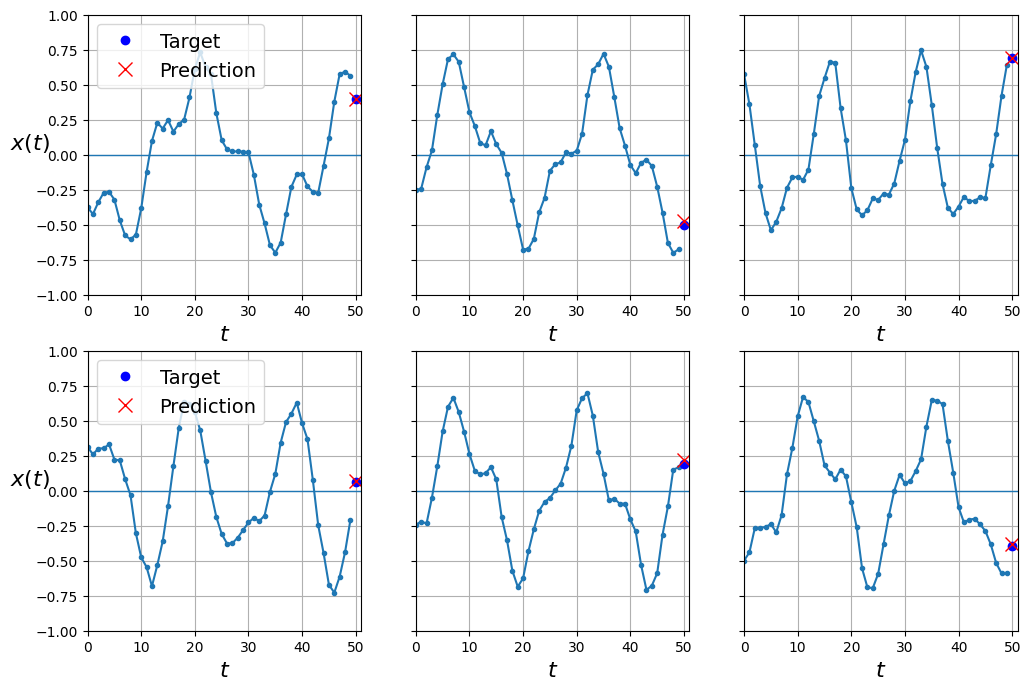

In [22]:
model_rnn3 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model_rnn3.compile(loss="mse", optimizer=optimizer)
model_rnn3.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
y_pred_rnn3 = model_rnn3.predict(X_valid)
print('mse: ',np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred_rnn3)))
plot_set(X_valid, y_valid, y_pred_rnn3)

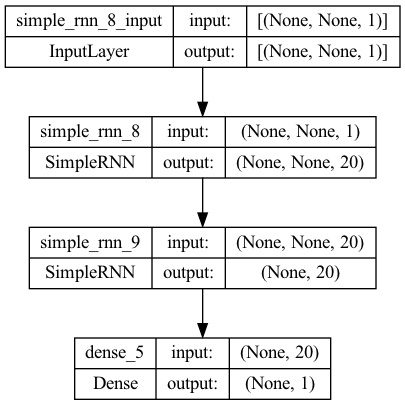

In [23]:
tf.keras.utils.plot_model(model_rnn3, "rnn.png", show_shapes=True)

In [24]:
model_rnn3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 12ms/step


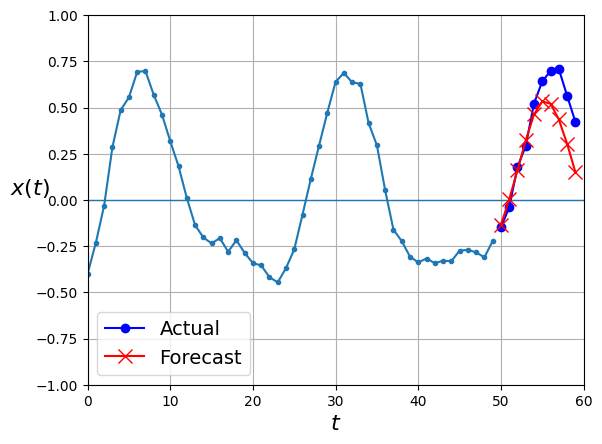

In [25]:
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model_rnn3.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# 10 values to predict

In [26]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

model_rnn10 = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(10)
])

model_rnn10.compile(loss="mse", optimizer="adam")
history = model_rnn10.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 3s 8ms/step - loss: 0.0467 - val_loss: 0.0229
Epoch 2/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 3/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0157 - val_loss: 0.0182
Epoch 4/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0142 - val_loss: 0.0130
Epoch 5/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0132 - val_loss: 0.0146
Epoch 6/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0125 - val_loss: 0.0118
Epoch 7/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 8/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0118 - val_loss: 0.0121
Epoch 9/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0111 - val_loss: 0.0113

1/1 [==============================] - 0s 149ms/step


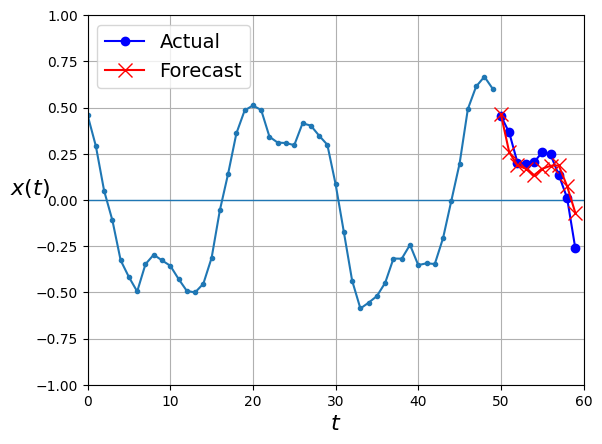

In [28]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model_rnn10.predict(X_new)[..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [29]:
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [30]:
model_rnn10d = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])
def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model_rnn10d.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model_rnn10d.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0514 - last_time_step_mse: 0.0414 - val_loss: 0.0429 - val_last_time_step_mse: 0.0318
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0386 - last_time_step_mse: 0.0271 - val_loss: 0.0346 - val_last_time_step_mse: 0.0222
Epoch 3/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0315 - last_time_step_mse: 0.0188 - val_loss: 0.0291 - val_last_time_step_mse: 0.0156
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0289 - last_time_step_mse: 0.0169 - val_loss: 0.0277 - val_last_time_step_mse: 0.0144
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0273 - last_time_step_mse: 0.0153 - val_loss: 0.0262 - val_last_time_step_mse: 0.0146
Epoch 6/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0264 - last_time_step_mse: 0.0147 - val_loss: 0.0258 - val_last_time_step_mse: 0.0139
Epoch 7/20
219/219 [========

1/1 [==============================] - 0s 146ms/step


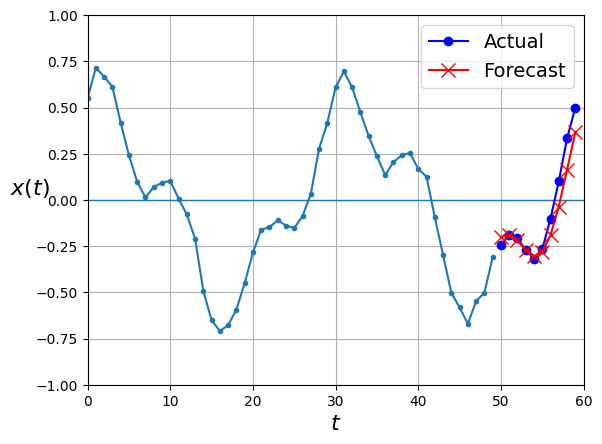

In [31]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model_rnn10d.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()